Import All Libraries

In [ ]:
import os
import glob
import shutil
import matplotlib.pyplot as plt

Plot class distribution function

In [ ]:
def plot_class_distribution(train_classes, train_counts, test_counts):
    fig, ax = plt.subplots()

    bar_width = 0.35
    index = range(len(train_classes))

    bar1 = ax.bar(index, train_counts, bar_width, label='Training')
    bar2 = ax.bar([i + bar_width for i in index], test_counts, bar_width, label='Testing')

    ax.set_xlabel('Class')
    ax.set_ylabel('Number of Data')
    ax.set_title('Number of Data in Training and Testing per Class')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(train_classes, rotation=45)
    ax.legend()

    plt.show()


Load dataset

In [ ]:
dataset = '.. /Dataset/FaceShape Dataset'

print('List dir:')
for file in os.listdir(dataset):
  print(file)

List dir:
testing_set
training_set


Remove .ini files

In [ ]:
for filename in glob.iglob(dataset + '/**/*.ini', recursive=True):
    os.remove(filename)
    print('deleted', filename)

print('done')

deleted ../Dataset/FaceShape Dataset/desktop.ini
deleted ../Dataset/FaceShape Dataset/testing_set/Round/desktop.ini
done


Load and count train and test dir

In [35]:
train_dir = os.path.join(dataset, 'training_set')
test_dir = os.path.join(dataset, 'testing_set')


# Mendapatkan jumlah file per kelas di direktori training dan testing
train_classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
test_classes = [d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]


train_counts = [len(os.listdir(os.path.join(train_dir, cls))) for cls in train_classes]
test_counts = [len(os.listdir(os.path.join(test_dir, cls))) for cls in test_classes]
print("Train counts:", train_counts)
print("Test counts:", test_counts)

Train counts: [800, 800, 800, 800, 800]
Test counts: [200, 200, 200, 200, 200]


Plot class distribution before reducing classes

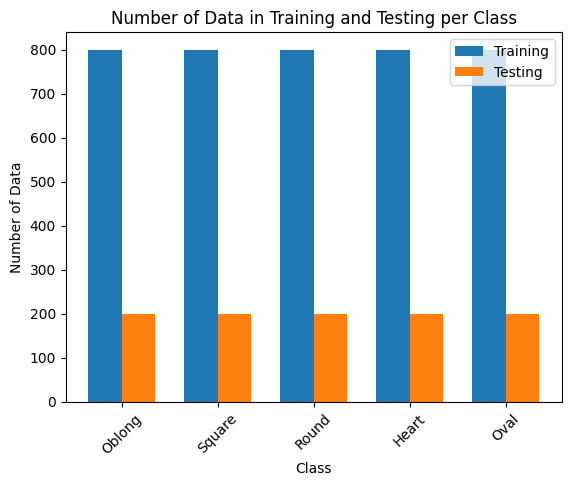

In [43]:
plot_class_distribution(train_classes, train_counts, test_counts)

Create new dataset with 3 classes [Oval, Square, Round]

In [ ]:
# Direktori baru untuk dataset 3 classes
new_dataset = '../Dataset/FaceShape 3 Classes'
new_train_dir = os.path.join(new_dataset, 'training_set')
new_test_dir = os.path.join(new_dataset, 'testing_set')

# Membuat direktori baru jika belum ada
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)

# Kelas yang akan dipindahkan
selected_classes = ['Square', 'Round', 'Oval']

# Memindahkan data training
for cls in selected_classes:
    src_dir = os.path.join(train_dir, cls)
    dst_dir = os.path.join(new_train_dir, cls)
    shutil.copytree(src_dir, dst_dir)

# Memindahkan data testing
for cls in selected_classes:
    src_dir = os.path.join(test_dir, cls)
    dst_dir = os.path.join(new_test_dir, cls)
    shutil.copytree(src_dir, dst_dir)

print("Dataset baru 'FaceShape 3 Classes' telah dibuat.")

Dataset baru 'FaceShape 3 Classes' telah dibuat.


Load new dataset

In [44]:
# Mendapatkan jumlah file per kelas di direktori training dan testing
new_train_classes = [d for d in os.listdir(new_train_dir) if os.path.isdir(os.path.join(new_train_dir, d))]
new_test_classes = [d for d in os.listdir(new_test_dir) if os.path.isdir(os.path.join(new_test_dir, d))]

new_train_counts = [len(os.listdir(os.path.join(new_train_dir, cls))) for cls in new_train_classes]
new_test_counts = [len(os.listdir(os.path.join(new_test_dir, cls))) for cls in new_test_classes]
print("New Train counts:", new_train_counts)
print("New Test counts:", new_test_counts)


New Train counts: [800, 800, 800]
New Test counts: [200, 200, 200]


After reducing classes

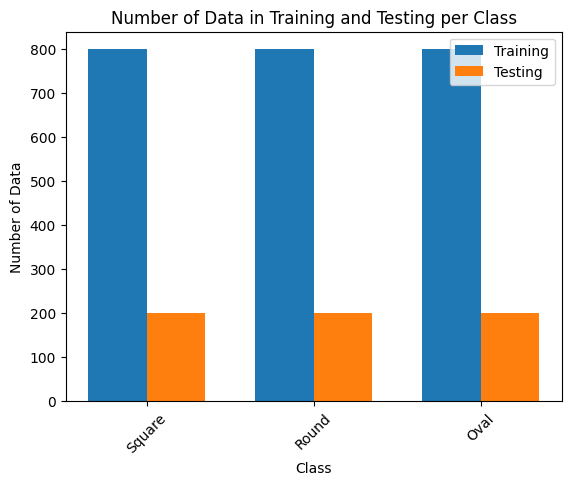

In [46]:
plot_class_distribution(new_train_classes, new_train_counts, new_test_counts)